In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import os

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
br_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/Owkin_Pilot_Data/Chromium/Breast/breast_final_owkin_annot.h5ad"

chrom = sc.read_h5ad(br_path)
marker_genes = ["NAMPT", "FKBP5", "LTF", "STAC2", "ALOX15B", "ANKRD30A", "ALCAM", "FABP7", 
                "CYP4F8", "AZGP1", "CLU", "ALDH3B2", 
                "FASN", "MGP", "ACSM1", "MUCL1", "APOD", "GATA3", "EVL", "IER2", "NTN4", 
                "SHROOM1", "KRT19", "MLPH", "RHOB", 
                "ERBB2", "ESR1", "PGR"]

In [3]:
chrom.obs.Level2.value_counts()
# chrom.obs.sample_id.value_counts()
# chrom.obs.patient.value_counts()

Level2
Tu_B3           2897
Fibro_muscle    2198
T_NK            1287
Tu_B1            944
Vessel           865
Tu_B4            850
B                759
Myeloid          758
Mast_cell        128
Granulocyte        3
Name: count, dtype: int64

In [4]:
sc.pp.normalize_total(chrom, target_sum=1e4)
sc.pp.log1p(chrom)

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.

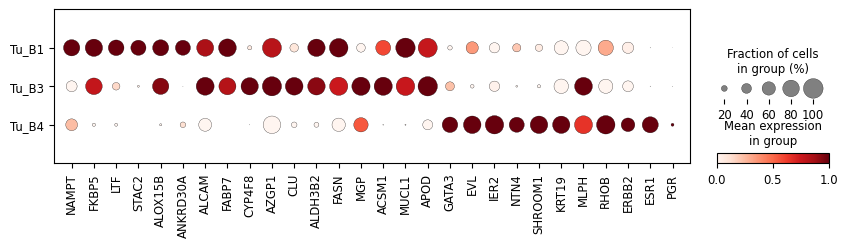

In [28]:
chrom_subset = chrom[chrom.obs['Level2'].isin(["Tu_B1", "Tu_B3", "Tu_B4"]), :]
fig = sc.pl.dotplot(chrom_subset, marker_genes, #[::-1], 
              # groupby = "patient", 
              # groupby = "sample_id",
              groupby = "Level2",
              standard_scale = "var", 
              log = False, 
              swap_axes = False,
              figsize=(10, 2),
              dot_min = 0, 
              return_fig = True)

fig.savefig("/work/PRTNR/CHUV/DIR/rgottar1/spatial/Owkin_Pilot_Results/Manuscript_Figures_Final/SuppFig/Chrom_Pt_Spec_Tumor_DotPlot/breast_dotplot.pdf", format='pdf')

In [29]:
lu_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/Owkin_Pilot_Data/Chromium/Lung/lung_final_owkin_annot.h5ad"
chrom = sc.read_h5ad(lu_path)
marker_genes = ["WFDC2", "F3", "TCIM", "HOPX", "AKR1C3", "PCSK2", "CPS1", "AKR1C2", "SFTPB", 
                    "GPRC5A", "PKHD1", "MYH14", "MSLN", "FXYD2", "ANXA4", "CD24", "MYO1D", "DDX52", "MUC1", 
                    "B2M", "FTH1", "CD74", "DCBLD2", "LAMB3", "CAV2", "TGFBI", "MDK", "COL17A1", "G0S2", "FAM3C", "ITGA3", 
                    "SERPINB1", "FURIN", "FXYD3", "AQP3", "DSP", "GSTP1", "TRIM29", "S100A9", "S100A2", "KRT17"]


In [30]:
chrom.obs.Level2.value_counts()

Level2
T_NK            11398
Myeloid          7988
B                7598
Fibro_muscle     3916
Tu_L4            1407
Vessel            855
Epithelia         648
Tu_L2             637
Tu_L3             578
Mast_cell         439
Tu_L1             306
Granulocyte       184
Name: count, dtype: int64

In [31]:
sc.pp.normalize_total(chrom, target_sum=1e4)
sc.pp.log1p(chrom)

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.

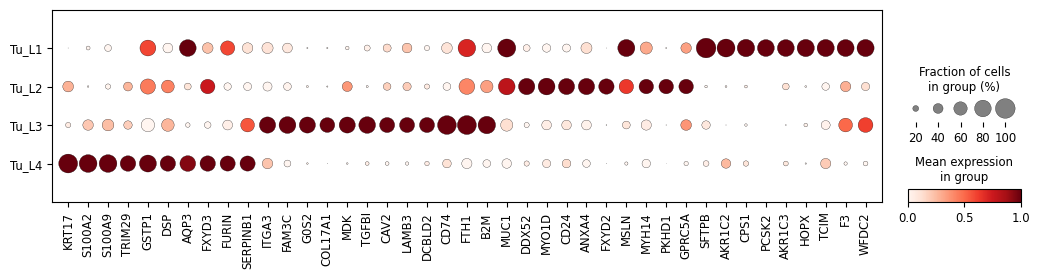

In [34]:
chrom_subset = chrom[chrom.obs['Level2'].isin(["Tu_L1", "Tu_L2", "Tu_L3", "Tu_L4"]), :]
fig = sc.pl.dotplot(chrom_subset, marker_genes[::-1], 
              # groupby = "patient", 
              # groupby = "sample_id",
              groupby = "Level2",
              standard_scale = "var", 
              log = False, 
              swap_axes = False,
              figsize=(12.5, 2.5),
              dot_min = 0, 
              return_fig = True)
fig.savefig("/work/PRTNR/CHUV/DIR/rgottar1/spatial/Owkin_Pilot_Results/Manuscript_Figures_Final/SuppFig/Chrom_Pt_Spec_Tumor_DotPlot/lung_dotplot.pdf", format='pdf')

In [36]:
dl_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/Owkin_Pilot_Data/Chromium/DLBCL/DLBCL_final_owkin_annot.h5ad"
chrom = sc.read_h5ad(dl_path)
marker_genes = ["NME2", "FCRL1", "LMO2", "IGKC", "MT-CO3", "TMSB4X", "GRHPR",
              "MPEG1", "CD1C", "CD52", "LTB", "SMIM14", "TNFRSF13C", "CD79A",
              "CD22", "FCRL2", "FCRL5",                                    # D1 clus 2, 5, 13, 19:
              "MT-CYB", "NIBAN3", "SPIB", "MT-ATP6", "HIST1H1C", "IGHM",
              "MT-ND4", "TCL1A", "MT-ND4L", # "HIST1H1R",                  # D2 clus 0:
              "CD83", "SWAP70", "SEL1L3", "FCRL3", "ACTB", "IL4I1", "FAM3C",
              "ACTG2", "CD74", "MS4A1", "MT-CYB", "CNN2", "LRMP", "LCP1",  # D3 clus 1, 6, 26:
              "GGA2", "HELLS", "RASGRP2", "NKX6-3", "DTX1", "BCL7A", "MAT2A",
              "ARGLU1", "ALOX5", "AKNA", "ARHGEF1", "PNN", "TMC8",         # D4 clus 9&22:
              "TSPAN33", "SPATC1", "NFKB2", "BCL2L1", # "OGI", 
              "CCL17", "CD40", "DUSP2", "ITPKB", "CCL22",                  # D5 clus 17:
              "POU2F2", "CCDC88A", "LENG8", "KLHL6", "TNFRSF13B", "BCL2",
              "NFATC1", "MT-ND6", "NIBAN3", "FCRL2"]                       # D6 clus 12:

In [37]:
chrom.obs.Level2.value_counts()

Level2
Tu_D3           8641
Tu_D1           6319
Tu_D2           5624
Myeloid         4473
T_NK            4070
Fibro_Muscle    2954
Epithelia       2945
Tu_D4           2005
Tu_D6           1152
Tu_D5           1019
Vessel           434
B                 77
Name: count, dtype: int64

In [38]:
sc.pp.normalize_total(chrom, target_sum=1e4)
sc.pp.log1p(chrom)

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/ydong/Mamba/envs/cellcharter-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.

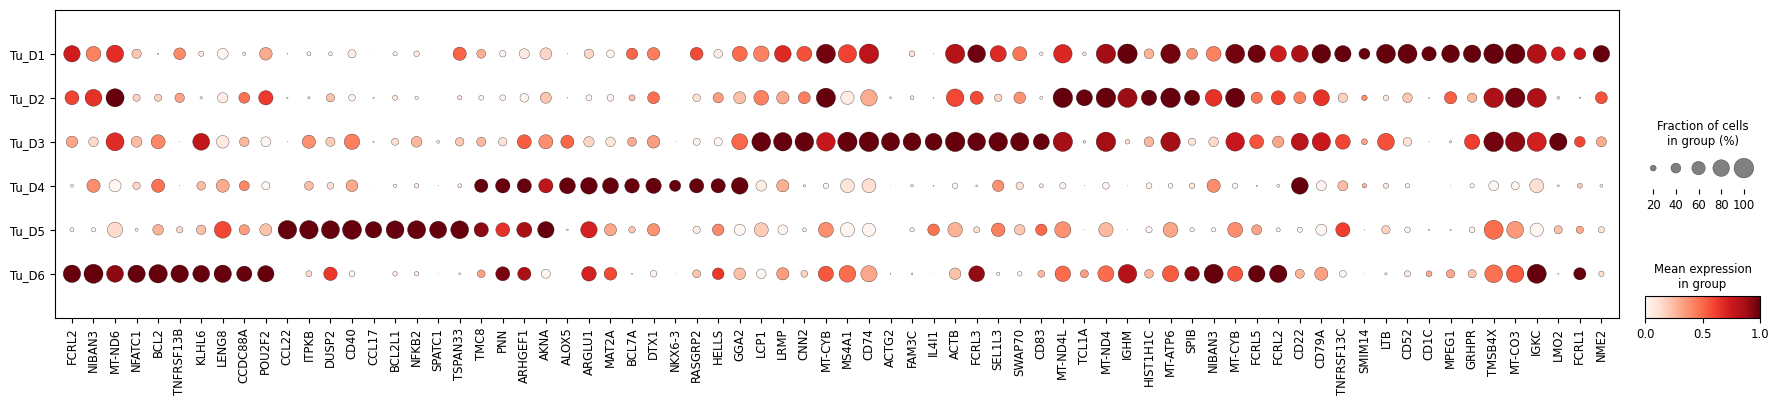

In [43]:
chrom_subset = chrom[chrom.obs['Level2'].isin(["Tu_D1", "Tu_D2", "Tu_D3", "Tu_D4", "Tu_D5", "Tu_D6"]), :]
fig = sc.pl.dotplot(chrom_subset, marker_genes[::-1], 
              # groupby = "patient", 
              # groupby = "sample_id",
              groupby = "Level2",
              standard_scale = "var", 
              log = False, 
              swap_axes = False,
              figsize=(22, 4),
              dot_min = 0, 
              return_fig = True)
fig.savefig("/work/PRTNR/CHUV/DIR/rgottar1/spatial/Owkin_Pilot_Results/Manuscript_Figures_Final/SuppFig/Chrom_Pt_Spec_Tumor_DotPlot/dlbcl_dotplot.pdf", format='pdf')